In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
stroke_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/stroke_data.csv", index_col="id")

# Data

In [ ]:
stroke_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


In [ ]:
stroke_df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## The "Other" gender label

<Axes: ylabel='stroke'>

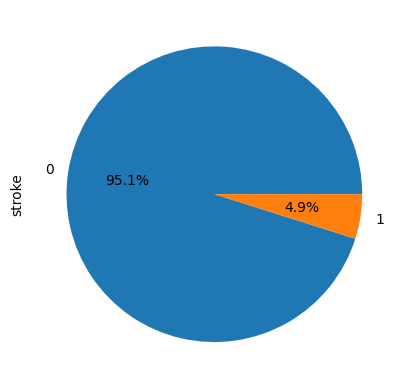

In [ ]:
stroke_df["stroke"].value_counts().plot(kind="pie", autopct='%.1f%%')

<Axes: ylabel='gender'>

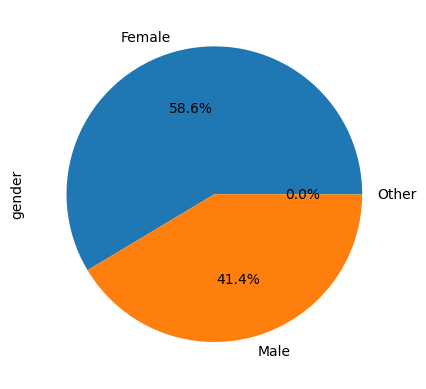

In [ ]:
stroke_df["gender"].value_counts().plot(kind="pie", autopct='%.1f%%')

In [ ]:
stroke_df.loc[stroke_df.gender == "Other","stroke"]

id
56156    0
Name: stroke, dtype: int64

In [ ]:
stroke_df = stroke_df.drop(index=stroke_df.loc[stroke_df.gender=="Other",:].index)

In [ ]:
stroke_df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,4908.00000,5109.000000
mean,43.229986,0.097475,0.054022,106.140399,28.89456,0.048738
std,22.613575,0.296633,0.226084,45.285004,7.85432,0.215340
min,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,25.000000,0.000000,0.000000,77.240000,23.50000,0.000000
50%,45.000000,0.000000,0.000000,91.880000,28.10000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.10000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


## Misssing values

In [ ]:
stroke_df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
gender_bmi_means = stroke_df.groupby('gender')['bmi'].mean().round(1)

def fill_missing_bmi(row):
    if pd.isnull(row['bmi']):
        return gender_bmi_means[row['gender']]
    else:
        return row['bmi']

stroke_df['bmi'] = stroke_df.apply(fill_missing_bmi, axis=1)

In [ ]:
stroke_df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
stroke_df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,43.229986,0.097475,0.054022,106.140399,28.892464,0.048738
std,22.613575,0.296633,0.226084,45.285004,7.698402,0.215340
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.240000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.880000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
stroke_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.1,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
18234,Female,80.0,1,0,Yes,Private,Urban,83.75,29.1,never smoked,0
44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


## Outliers

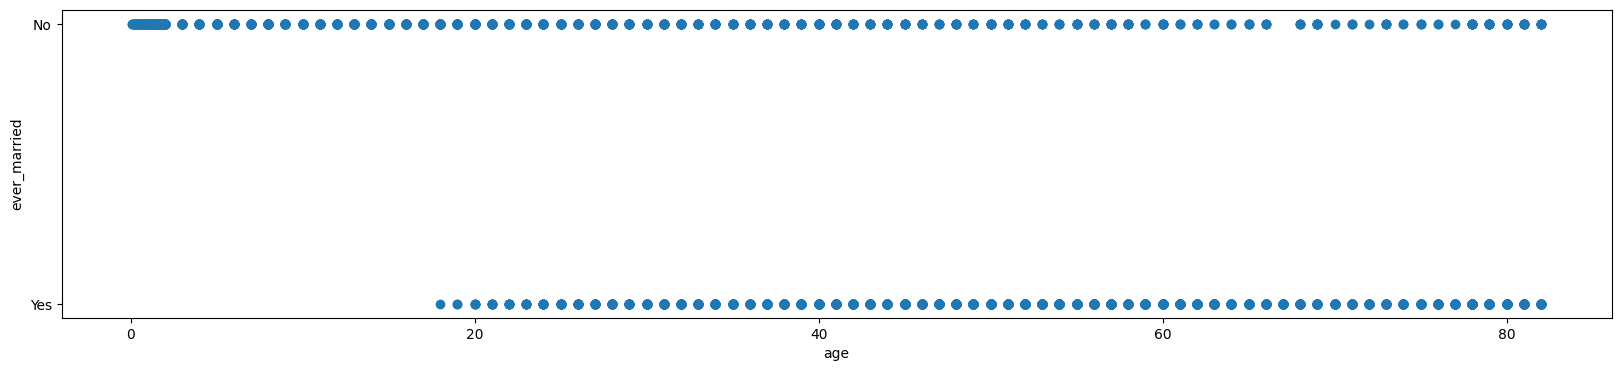

In [ ]:
plt.figure(figsize=(20,4))
plt.scatter(stroke_df.age,stroke_df.ever_married)
plt.xlabel("age")
plt.ylabel("ever_married")
plt.show()

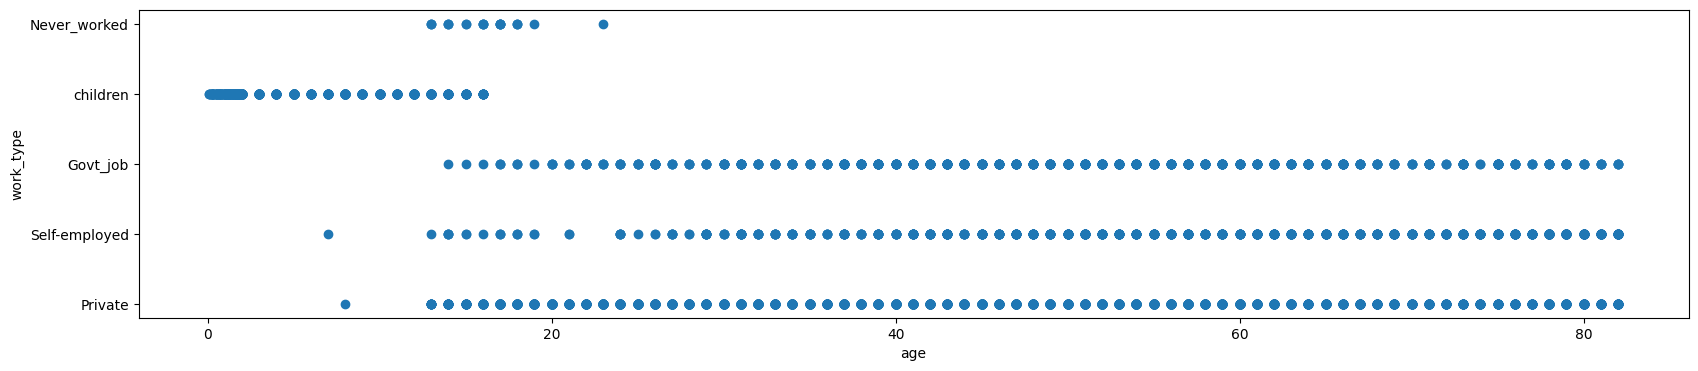

In [ ]:
plt.figure(figsize=(20,4))
plt.scatter(stroke_df.age,stroke_df.work_type)
plt.xlabel("age")
plt.ylabel("work_type")
plt.show()

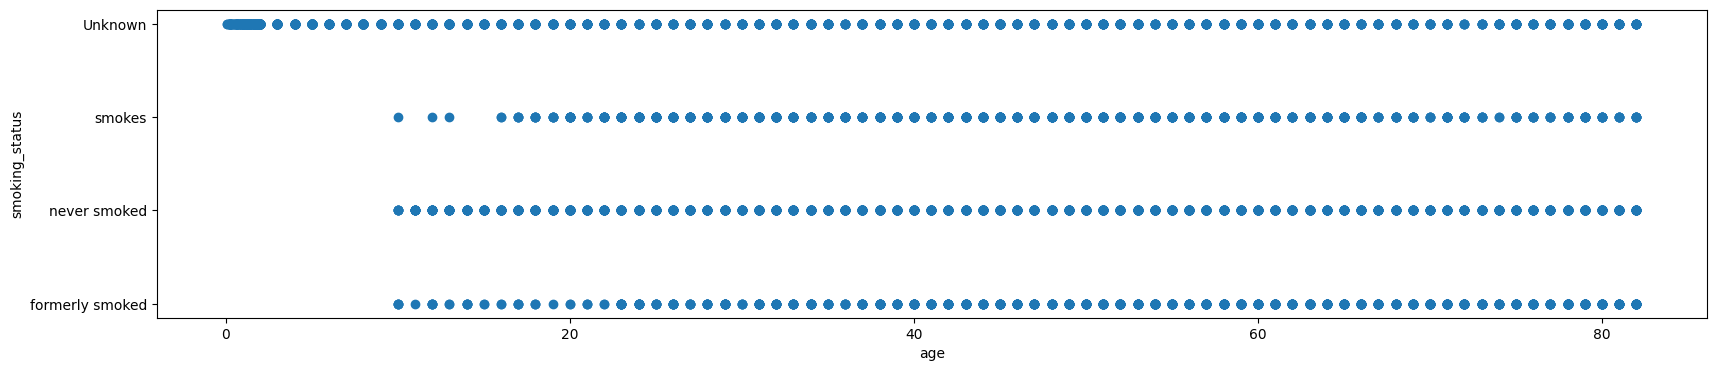

In [ ]:
plt.figure(figsize=(20,4))
plt.scatter(stroke_df.age,stroke_df.smoking_status)
plt.xlabel("age")
plt.ylabel("smoking_status")
plt.show()

## Plotting and calculation

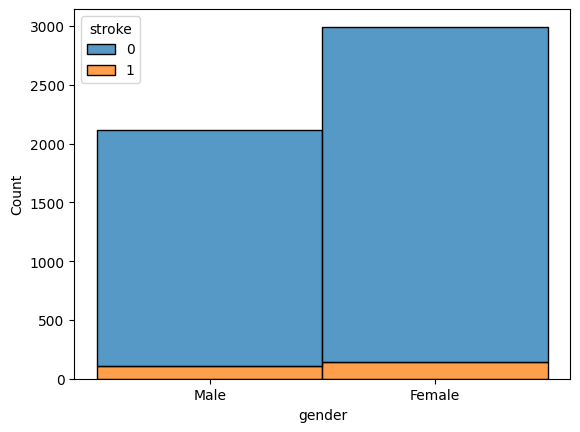

In [ ]:
sns.histplot(x="gender",hue="stroke",multiple="stack",data=stroke_df)
plt.show()

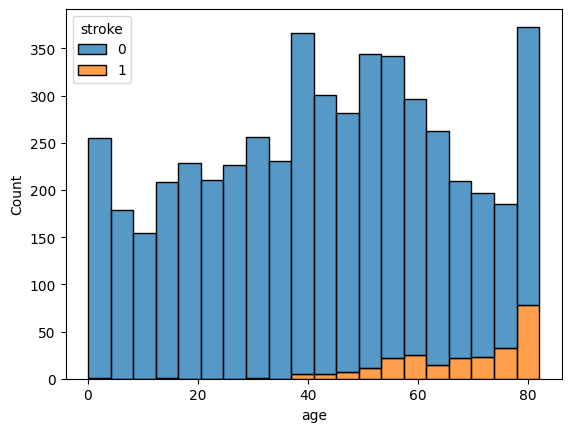

In [ ]:
sns.histplot(x="age",hue="stroke",multiple="stack",data=stroke_df)
plt.show()

In [ ]:
stroke_df.loc[stroke_df.hypertension == 1,"stroke"].mean()

0.13253012048192772

In [ ]:
stroke_df.loc[stroke_df.heart_disease == 1,"stroke"].mean()

0.17028985507246377

In [ ]:
stroke_df.loc[(stroke_df.hypertension == 1)&(stroke_df.heart_disease == 1),"stroke"].mean()

0.203125

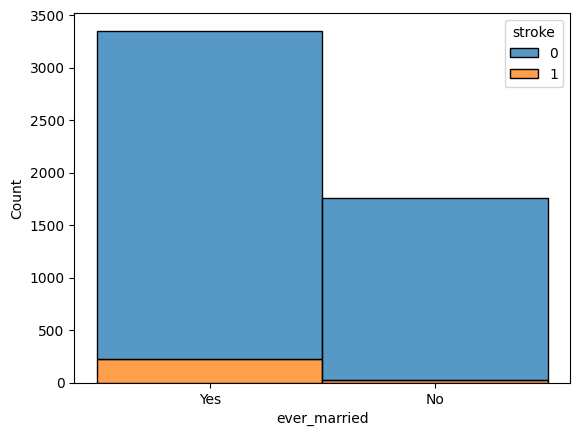

In [ ]:
sns.histplot(x="ever_married",hue="stroke",multiple="stack",data=stroke_df)
plt.show()

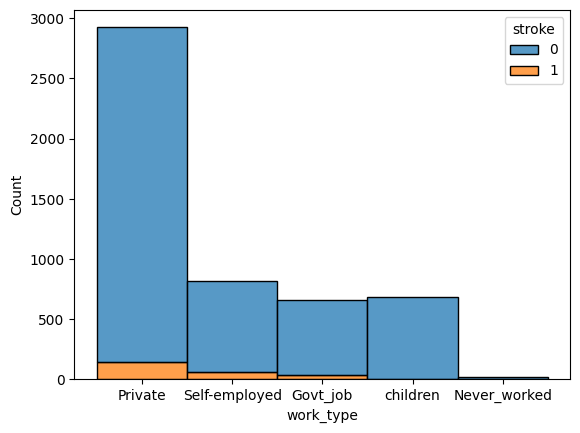

In [ ]:
sns.histplot(x="work_type",hue="stroke",multiple="stack",data=stroke_df)
plt.show()

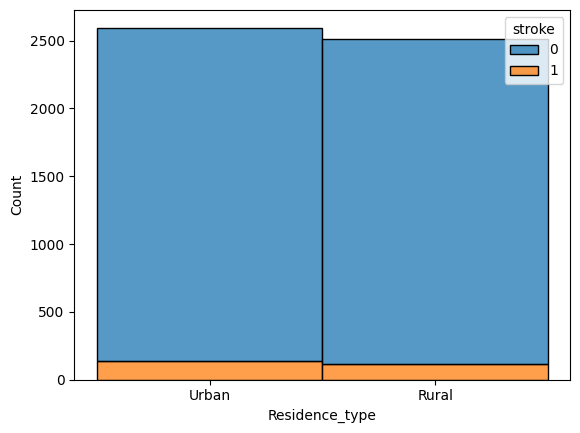

In [ ]:
sns.histplot(x="Residence_type",hue="stroke",multiple="stack",data=stroke_df)
plt.show()

In [ ]:
stroke_df = stroke_df.drop(columns="Residence_type")

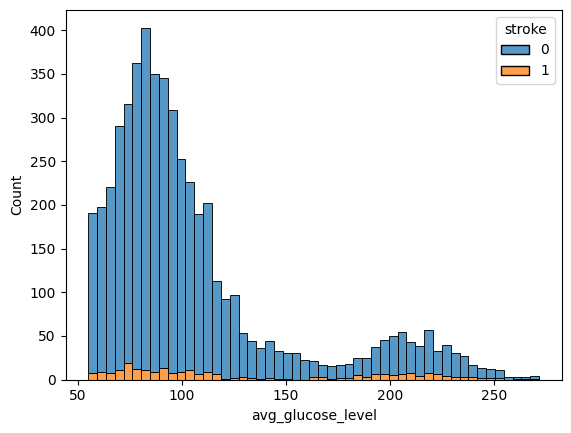

In [ ]:
sns.histplot(x="avg_glucose_level",hue="stroke",multiple="stack",data=stroke_df)
plt.show()

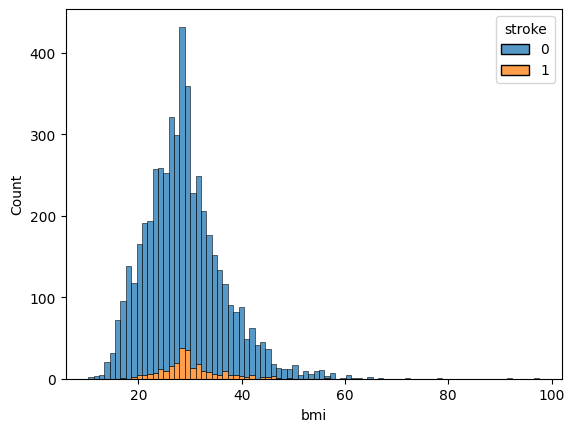

In [ ]:
sns.histplot(x="bmi",hue="stroke",multiple="stack",data=stroke_df)
plt.show()

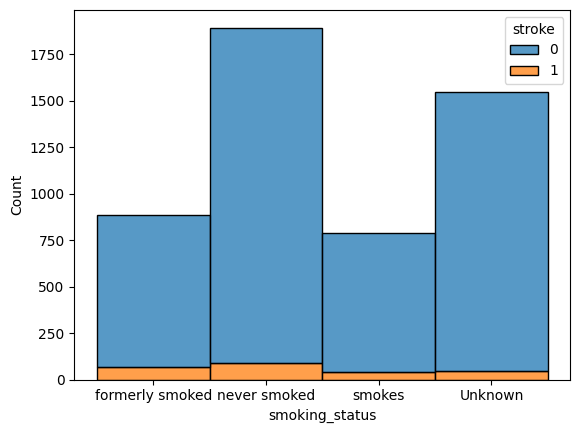

In [ ]:
sns.histplot(x="smoking_status",hue="stroke",multiple="stack",data=stroke_df)
plt.show()

#Features

## Label encoder

In [ ]:
gender_mapping = {'Female': 0, 'Male': 1}
ever_married_mapping = {'No': 0, 'Yes': 1}
work_type_mapping = {'children': 0, 'Govt_job': 1, 'Never_worked': 2, 'Private': 3, 'Self-employed': 4}
smoking_status_mapping = {'formerly smoked': 0, 'never smoked': 1, 'smokes': 2, 'Unknown': 3}

stroke_df['gender'] = stroke_df['gender'].map(gender_mapping)
stroke_df['ever_married'] = stroke_df['ever_married'].map(ever_married_mapping)
stroke_df['work_type'] = stroke_df['work_type'].map(work_type_mapping)
stroke_df['smoking_status'] = stroke_df['smoking_status'].map(smoking_status_mapping)

gender: Male 1 Female 0


In [ ]:
stroke_df

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,
9046,1,67.0,0,1,1,3,228.69,36.6,0,1
51676,0,61.0,0,0,1,4,202.21,29.1,1,1
31112,1,80.0,0,1,1,3,105.92,32.5,1,1
60182,0,49.0,0,0,1,3,171.23,34.4,2,1
1665,0,79.0,1,0,1,4,174.12,24.0,1,1
...,...,...,...,...,...,...,...,...,...,...
18234,0,80.0,1,0,1,3,83.75,29.1,1,0
44873,0,81.0,0,0,1,4,125.20,40.0,1,0
19723,0,35.0,0,0,1,4,82.99,30.6,1,0


## Correlation between attributes

<Axes: >

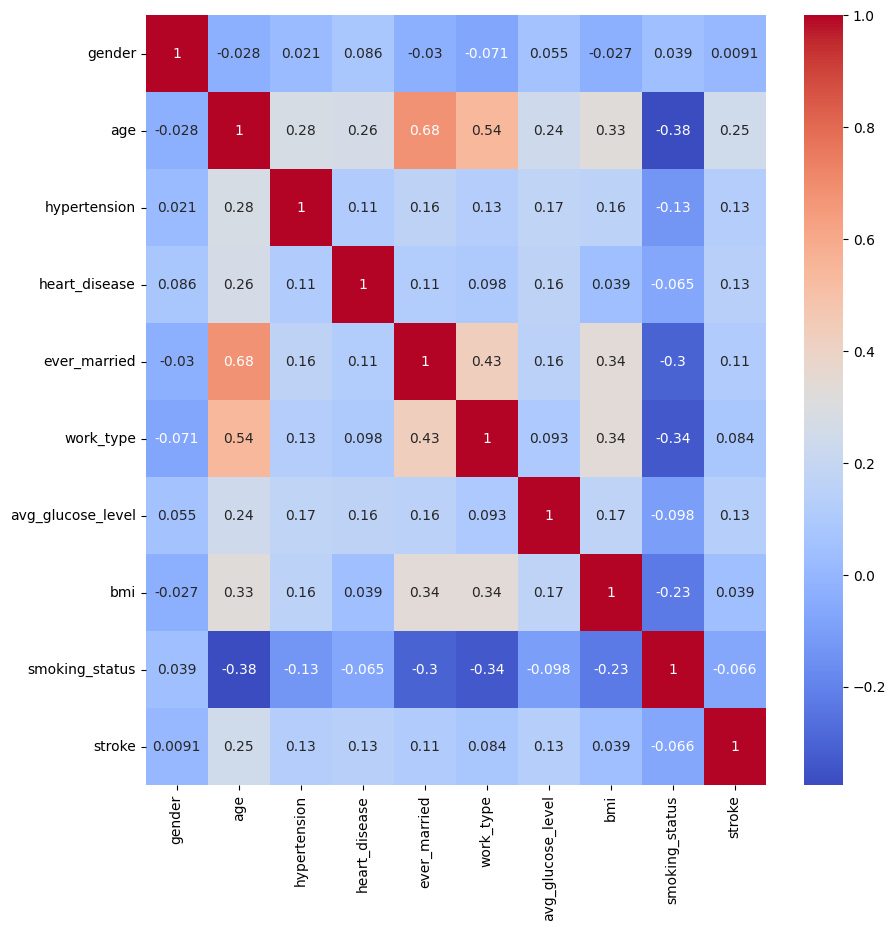

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(stroke_df.corr(), annot=True, cmap='coolwarm')

# Model training

## Train/test split

In [ ]:
stroke_df_train, stroke_df_test = train_test_split(stroke_df,test_size = 0.2,stratify=stroke_df.stroke,random_state=42)
X_train = stroke_df_train.loc[:,["gender","age","hypertension","heart_disease","ever_married","work_type","avg_glucose_level","bmi","smoking_status"]].values
y_train = stroke_df_train.stroke.values
X_test = stroke_df_test.loc[:,["gender","age","hypertension","heart_disease","ever_married","work_type","avg_glucose_level","bmi","smoking_status"]].values
y_test = stroke_df_test.stroke.values

## Logistic regression

In [ ]:
lr_model = LogisticRegression(max_iter=1000,random_state=42)
lr_model.fit(X=X_train, y=y_train)
y_test_predicted_lr = lr_model.predict(X_test)
report_lr = classification_report(y_pred=y_test_predicted_lr,y_true=y_test)
print(report_lr)

cf = pd.DataFrame(columns=["y_test_0","y_test_1"],index=["y_pred_0","y_pred_1"])
cf.loc[:,:] = confusion_matrix(y_true= y_test,y_pred= y_test_predicted_lr)
cf/len(y_test)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,y_test_0,y_test_1
y_pred_0,0.951076,0.0
y_pred_1,0.048924,0.0


## Decision tree

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X=X_train,y=y_train)
y_test_predicted_dt = dt_model.predict(X_test)
report_dt = classification_report(y_pred=y_test_predicted_dt,y_true=y_test)
print(report_dt)

cf = pd.DataFrame(columns=["y_test_0","y_test_1"],index=["y_pred_0","y_pred_1"])
cf.loc[:,:] = confusion_matrix(y_true= y_test,y_pred= y_test_predicted_dt)
cf/len(y_test)

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       972
           1       0.12      0.20      0.15        50

    accuracy                           0.89      1022
   macro avg       0.54      0.56      0.55      1022
weighted avg       0.92      0.89      0.90      1022



,y_test_0,y_test_1
y_pred_0,0.882583,0.068493
y_pred_1,0.039139,0.009785


## AdaBoost

In [ ]:
ab_model = AdaBoostClassifier(n_estimators=50,random_state=42)
ab_model.fit(X=X_train,y=y_train)
y_test_predicted_ab = ab_model.predict(X_test)
report_ab = classification_report(y_pred=y_test_predicted_ab,y_true=y_test)
print(report_ab)

cf = pd.DataFrame(columns=["y_test_0","y_test_1"],index=["y_pred_0","y_pred_1"])
cf.loc[:,:] = confusion_matrix(y_true= y_test,y_pred= y_test_predicted_ab)
cf/len(y_test)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,y_test_0,y_test_1
y_pred_0,0.951076,0.0
y_pred_1,0.048924,0.0


## MLP

In [ ]:
nn_model = MLPClassifier(hidden_layer_sizes=(10,20,10),max_iter=1000,random_state=42)
nn_model.fit(X=X_train,y=y_train)
y_test_predicted_nn = nn_model.predict(X_test)
report_nn = classification_report(y_pred=y_test_predicted_nn,y_true=y_test)
print(report_nn)

cf = pd.DataFrame(columns=["y_test_0","y_test_1"],index=["y_pred_0","y_pred_1"])
cf.loc[:,:] = confusion_matrix(y_true= y_test,y_pred= y_test_predicted_nn)
cf/len(y_test)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.43      0.06      0.11        50

    accuracy                           0.95      1022
   macro avg       0.69      0.53      0.54      1022
weighted avg       0.93      0.95      0.93      1022



,y_test_0,y_test_1
y_pred_0,0.947162,0.003914
y_pred_1,0.045988,0.002935


## Random forest

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X=X_train,y=y_train)
y_test_predicted_rf = rf_model.predict(X_test)
report_rf = classification_report(y_pred=y_test_predicted_rf,y_true=y_test)
print(report_rf)

cf = pd.DataFrame(columns=["y_test_0","y_test_1"],index=["y_pred_0","y_pred_1"])
cf.loc[:,:] = confusion_matrix(y_true= y_test,y_pred= y_test_predicted_rf)
cf/len(y_test)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



,y_test_0,y_test_1
y_pred_0,0.950098,0.000978
y_pred_1,0.048924,0.0


# Outliers suppression

In [ ]:
stroke_df = stroke_df.drop(index=stroke_df[(stroke_df.age<10)&(stroke_df.work_type=="Self-employed")].index)
stroke_df = stroke_df.drop(index=stroke_df[(stroke_df.age<10)&(stroke_df.work_type=="Private")].index)

X_train = stroke_df_train.loc[:,["gender","age","hypertension","heart_disease","ever_married","work_type","avg_glucose_level","bmi","smoking_status"]].values
y_train = stroke_df_train.stroke.values
X_test = stroke_df_test.loc[:,["gender","age","hypertension","heart_disease","ever_married","work_type","avg_glucose_level","bmi","smoking_status"]].values
y_test = stroke_df_test.stroke.values

## Logistic regression

In [ ]:
lr_model = LogisticRegression(max_iter=1000,random_state=42)
lr_model.fit(X=X_train, y=y_train)
y_test_predicted_lr = lr_model.predict(X_test)
report_lr = classification_report(y_pred=y_test_predicted_lr,y_true=y_test)
print(report_lr)

cf = pd.DataFrame(columns=["y_test_0","y_test_1"],index=["y_pred_0","y_pred_1"])
cf.loc[:,:] = confusion_matrix(y_true= y_test,y_pred= y_test_predicted_lr)
cf/len(y_test)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,y_test_0,y_test_1
y_pred_0,0.951076,0.0
y_pred_1,0.048924,0.0


## Decision tree

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X=X_train,y=y_train)
y_test_predicted_dt = dt_model.predict(X_test)
report_dt = classification_report(y_pred=y_test_predicted_dt,y_true=y_test)
print(report_dt)

cf = pd.DataFrame(columns=["y_test_0","y_test_1"],index=["y_pred_0","y_pred_1"])
cf.loc[:,:] = confusion_matrix(y_true= y_test,y_pred= y_test_predicted_dt)
cf/len(y_test)

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       972
           1       0.12      0.20      0.15        50

    accuracy                           0.89      1022
   macro avg       0.54      0.56      0.55      1022
weighted avg       0.92      0.89      0.90      1022



,y_test_0,y_test_1
y_pred_0,0.882583,0.068493
y_pred_1,0.039139,0.009785


## AdaBoost

In [ ]:
ab_model = AdaBoostClassifier(n_estimators=50,random_state=42)
ab_model.fit(X=X_train,y=y_train)
y_test_predicted_ab = ab_model.predict(X_test)
report_ab = classification_report(y_pred=y_test_predicted_ab,y_true=y_test)
print(report_ab)

cf = pd.DataFrame(columns=["y_test_0","y_test_1"],index=["y_pred_0","y_pred_1"])
cf.loc[:,:] = confusion_matrix(y_true= y_test,y_pred= y_test_predicted_ab)
cf/len(y_test)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,y_test_0,y_test_1
y_pred_0,0.951076,0.0
y_pred_1,0.048924,0.0


## MLP

In [ ]:
nn_model = MLPClassifier(hidden_layer_sizes=(10,20,10),max_iter=1000,random_state=42)
nn_model.fit(X=X_train,y=y_train)
y_test_predicted_nn = nn_model.predict(X_test)
report_nn = classification_report(y_pred=y_test_predicted_nn,y_true=y_test)
print(report_nn)

cf = pd.DataFrame(columns=["y_test_0","y_test_1"],index=["y_pred_0","y_pred_1"])
cf.loc[:,:] = confusion_matrix(y_true= y_test,y_pred= y_test_predicted_nn)
cf/len(y_test)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.43      0.06      0.11        50

    accuracy                           0.95      1022
   macro avg       0.69      0.53      0.54      1022
weighted avg       0.93      0.95      0.93      1022



,y_test_0,y_test_1
y_pred_0,0.947162,0.003914
y_pred_1,0.045988,0.002935


## Random forest

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X=X_train,y=y_train)
y_test_predicted_rf = rf_model.predict(X_test)
report_rf = classification_report(y_pred=y_test_predicted_rf,y_true=y_test)
print(report_rf)

cf = pd.DataFrame(columns=["y_test_0","y_test_1"],index=["y_pred_0","y_pred_1"])
cf.loc[:,:] = confusion_matrix(y_true= y_test,y_pred= y_test_predicted_rf)
cf/len(y_test)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



,y_test_0,y_test_1
y_pred_0,0.950098,0.000978
y_pred_1,0.048924,0.0


# Creating of requirements.txt file

In [ ]:
import subprocess
result = subprocess.check_output(['pip', 'freeze'])
with open('/content/drive/MyDrive/Colab Notebooks/requirements.txt', 'wb') as f:
    f.write(result)